In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tides Dataset Preprocessing

### Specify Paths

In [2]:
data_folder = os.path.join("..", "data")

tides_data_path = os.path.join(
    data_folder, "further_features", "thames-tideway-tower-pier-tidal.csv"
)

temporary_results_folder = os.path.join(data_folder, "temporary results")

### Load Dataset

In [3]:
tides_df = pd.read_csv(tides_data_path, parse_dates=["date"])

## Inspect Dataset

In [4]:
tides_df.describe()

,date,min_level,avg_level,max_level
count,3978,3978.000000,3978.000000,3978.000000
mean,2018-07-07 08:42:21.176470784,-6.911506,0.249390,2.261489
min,2012-11-26 00:00:00,-21641.800000,-308.475000,-5.297000
25%,2015-09-27 06:00:00,-2.430000,0.200000,0.900000
50%,2018-06-20 12:00:00,-1.960000,0.491500,3.145000
75%,2021-05-11 18:00:00,0.100000,0.761000,3.690000
max,2024-01-31 00:00:00,4.030000,4.030000,14.000000
std,NaN,343.112768,5.060552,2.061134


In [5]:
tides_df.set_index("date", inplace=True)
tides_df.sort_index(inplace=True)

## Remove Outliers

In [6]:
low_quantile_level = 0.25
high_quantile_level = 0.75

In [7]:
tides_df.quantile([low_quantile_level, high_quantile_level])

,min_level,avg_level,max_level
0.25,-2.43,0.200,0.90
0.75,0.10,0.761,3.69


In [8]:
# remove outliers
quantiles_df = tides_df.quantile([low_quantile_level, high_quantile_level])

for col in tides_df.columns:
    quartile1, quartile3 = (
        quantiles_df[col][low_quantile_level],
        quantiles_df[col][high_quantile_level],
    )
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (1.5 * iqr)
    upper_bound = quartile3 + (1.5 * iqr)

    tides_df[col] = tides_df[col].apply(
        lambda x: np.nan if x < lower_bound or x > upper_bound else x
    )

<Axes: >

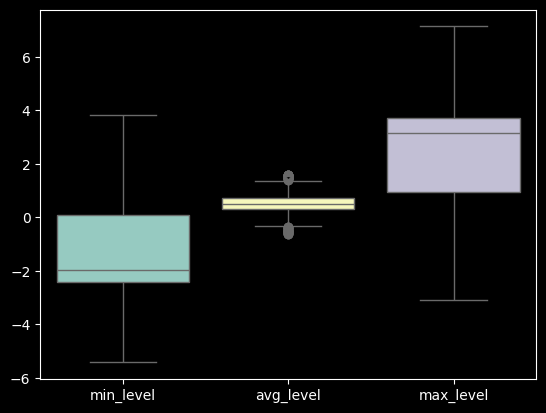

In [9]:
sns.boxplot(data=tides_df)

<Axes: xlabel='date'>

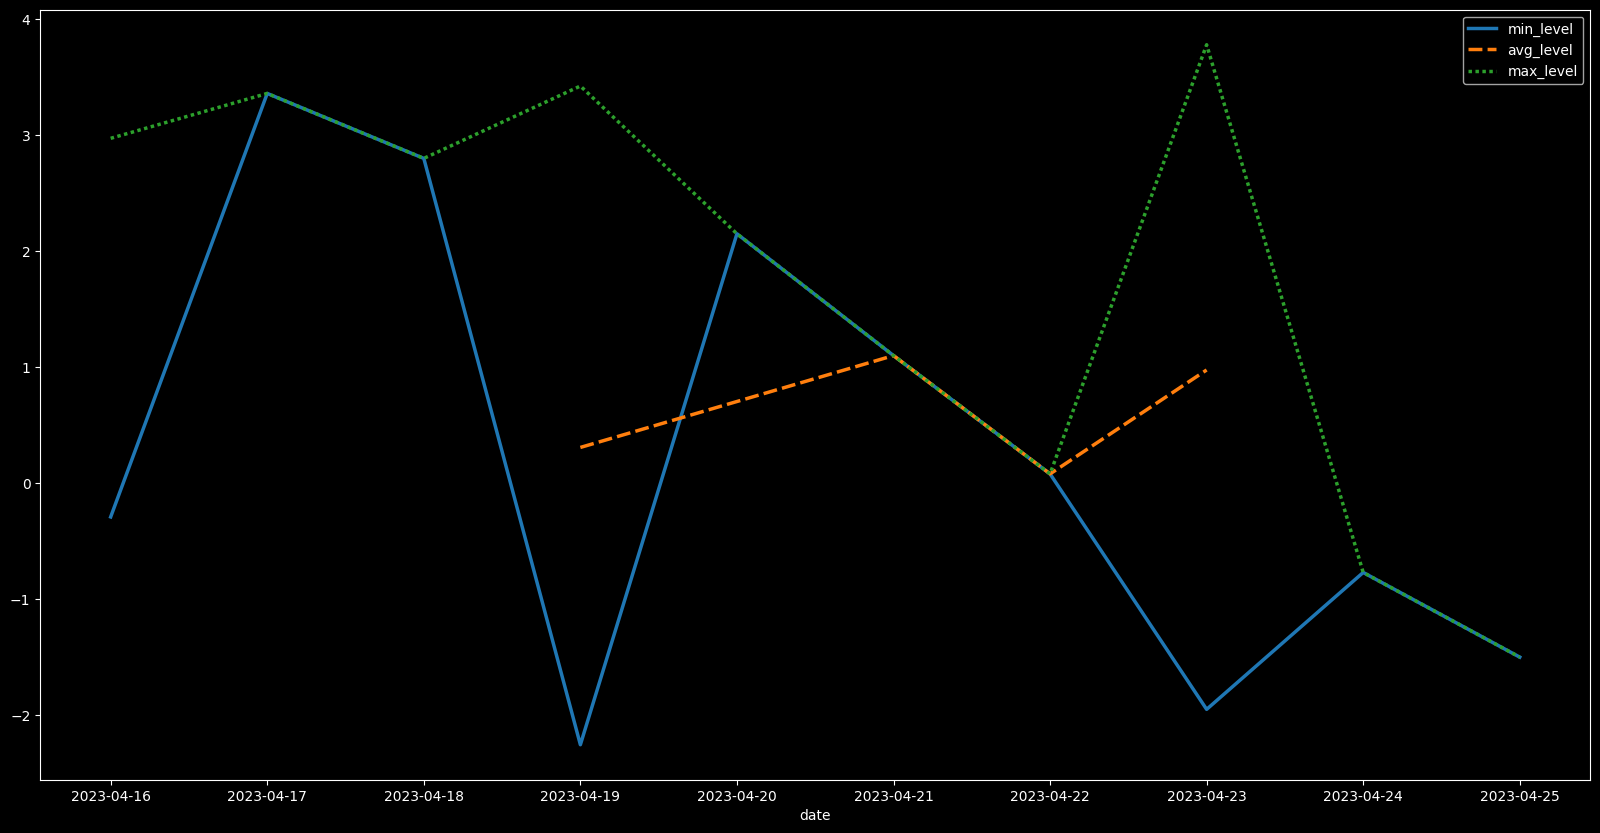

In [10]:
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=tides_df[
        (tides_df.index.year == 2023)
        & (tides_df.index.month == 4)
        & (tides_df.index.day > 15)
        & (tides_df.index.day < 26)
    ],
    palette="tab10",
    linewidth=2.5,
)

# Access CSO API

In [11]:
"""
Thames Water Open Data example code in Python.
"""

# Requests handles fetching the data and pandas for data manipulation
import requests
import pandas as pd

# add in your API credentials here
clientID = "7b7c7dc4f1c84159934bb191b1d471bf"
clientSecret = "CA65B1E2cBa243E09244E6363cc3566d"

# modify this url as desired to access the different end points. e.g. replace DischargeCurrentStatus at the end of the resource URL
api_root = "https://prod-tw-opendata-app.uk-e1.cloudhub.io"
api_resource = "/data/STE/v1/DischargeAlerts"
url = api_root + api_resource

# add here any query parameters if using them e.g. date filters, leave as '' for none.
params = (
    "col_1=LocationName"
    + "&operand_1=eq"
    + "&value_1=Fleet Main Line Sewer"
    + "&col_2=DateTime"
    + "&operand_2=gt"
    + "&value_2=2023-01-01T00:00:00Z"
    + "&col_3=DateTime"
    + "&operand_3=lt"
    + "&value_3=2023-12-31T00:00:00Z"
    + "&limit=1000"
)

# send the request
r = requests.get(
    url,
    headers={"client_id": clientID, "client_secret": clientSecret},
    params=params,
)
print("Requesting from " + r.url)

# check response status and use only valid requests
if r.status_code == 200:
    response = r.json()
    df = pd.json_normalize(response, "items")
else:
    raise Exception(
        "Request failed with status code {0}, and error message: {1}".format(
            r.status_code, r.json()
        )
    )

Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?col_1=LocationName&operand_1=eq&value_1=Fleet%20Main%20Line%20Sewer&col_2=DateTime&operand_2=gt&value_2=2023-01-01T00:00:00Z&col_3=DateTime&operand_3=lt&value_3=2023-12-31T00:00:00Z&limit=1000


In [12]:
df

,LocationName,PermitNumber,LocationGridRef,X,Y,ReceivingWaterCourse,AlertType,DateTime
0,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-19T12:32:00
1,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-19T11:02:00
2,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-12T07:16:00
3,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-12T06:08:00
4,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-09T11:20:00
...,...,...,...,...,...,...,...,...
995,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10T03:50:00
996,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10T03:30:00
997,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10T03:10:00
998,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10T03:02:00


In [13]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [14]:
df.sort_values(by=["DateTime"], inplace=True)

In [15]:
df

,LocationName,PermitNumber,LocationGridRef,X,Y,ReceivingWaterCourse,AlertType,DateTime
999,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 02:54:00
998,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10 03:02:00
997,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 03:10:00
996,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10 03:30:00
995,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 03:50:00
...,...,...,...,...,...,...,...,...
4,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-09 11:20:00
3,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-12 06:08:00
2,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-12 07:16:00
1,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-19 11:02:00


In [16]:
# create time interval dataframe where each row is the time interval between the current and next row of the original dataframe
df_intervals = df.copy()
df_intervals["TimeInterval"] = (
    df_intervals["DateTime"].shift(-1) - df_intervals["DateTime"]
)
df_intervals.dropna(inplace=True)

In [17]:
df_intervals

,LocationName,PermitNumber,LocationGridRef,X,Y,ReceivingWaterCourse,AlertType,DateTime,TimeInterval
999,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 02:54:00,0 days 00:08:00
998,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10 03:02:00,0 days 00:08:00
997,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 03:10:00,0 days 00:20:00
996,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10 03:30:00,0 days 00:20:00
995,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 03:50:00,0 days 00:08:00
...,...,...,...,...,...,...,...,...,...
5,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-09 09:24:00,0 days 01:56:00
4,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-09 11:20:00,2 days 18:48:00
3,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-12 06:08:00,0 days 01:08:00
2,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-12 07:16:00,7 days 03:46:00


In [18]:
# Create a new column 'TimeInterval' where each row is a pd.Interval between the current and next row of the 'DateTime' column
df_int = df.copy()
# Create a new column 'NextDateTime' with the 'DateTime' of the next row
df_int["NextDateTime"] = df_int["DateTime"].shift(-1)

# Drop the last row, which will have a NaN value in the 'NextDateTime' column
df_int.dropna(inplace=True)

# Rename the 'DateTime' column to 'StartDateTime' and the 'NextDateTime' column to 'EndDateTime'
df_int.rename(
    columns={"DateTime": "StartDateTime", "NextDateTime": "EndDateTime"},
    inplace=True,
)

In [19]:
df_int

,LocationName,PermitNumber,LocationGridRef,X,Y,ReceivingWaterCourse,AlertType,StartDateTime,EndDateTime
999,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 02:54:00,2023-01-10 03:02:00
998,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10 03:02:00,2023-01-10 03:10:00
997,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 03:10:00,2023-01-10 03:30:00
996,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10 03:30:00,2023-01-10 03:50:00
995,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 03:50:00,2023-01-10 03:58:00
...,...,...,...,...,...,...,...,...,...
5,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-09 09:24:00,2023-12-09 11:20:00
4,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-09 11:20:00,2023-12-12 06:08:00
3,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-12 06:08:00,2023-12-12 07:16:00
2,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-12 07:16:00,2023-12-19 11:02:00


In [20]:
# add boolean column to indicate if the cso is active in a given time interval
# is active if the row has a Start AlertType
df_int["Active"] = df_int["AlertType"] == "Start"

In [21]:
df_int

,LocationName,PermitNumber,LocationGridRef,X,Y,ReceivingWaterCourse,AlertType,StartDateTime,EndDateTime,Active
999,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 02:54:00,2023-01-10 03:02:00,True
998,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10 03:02:00,2023-01-10 03:10:00,False
997,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 03:10:00,2023-01-10 03:30:00,True
996,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-01-10 03:30:00,2023-01-10 03:50:00,False
995,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-01-10 03:50:00,2023-01-10 03:58:00,True
...,...,...,...,...,...,...,...,...,...,...
5,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-09 09:24:00,2023-12-09 11:20:00,True
4,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-09 11:20:00,2023-12-12 06:08:00,False
3,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Start,2023-12-12 06:08:00,2023-12-12 07:16:00,True
2,Fleet Main Line Sewer,CSAB.0541,TQ31658080,531650,180800,River Thames,Stop,2023-12-12 07:16:00,2023-12-19 11:02:00,False


In [22]:
df_int = df_int[["StartDateTime", "EndDateTime", "Active"]]

In [23]:
df_int.dtypes

StartDateTime    datetime64[ns]
EndDateTime      datetime64[ns]
Active                     bool
dtype: object

In [24]:
df_int

,StartDateTime,EndDateTime,Active
999,2023-01-10 02:54:00,2023-01-10 03:02:00,True
998,2023-01-10 03:02:00,2023-01-10 03:10:00,False
997,2023-01-10 03:10:00,2023-01-10 03:30:00,True
996,2023-01-10 03:30:00,2023-01-10 03:50:00,False
995,2023-01-10 03:50:00,2023-01-10 03:58:00,True
...,...,...,...
5,2023-12-09 09:24:00,2023-12-09 11:20:00,True
4,2023-12-09 11:20:00,2023-12-12 06:08:00,False
3,2023-12-12 06:08:00,2023-12-12 07:16:00,True
2,2023-12-12 07:16:00,2023-12-19 11:02:00,False


In [25]:
df_int.to_excel(
    os.path.join(temporary_results_folder, "cso_intervals.xlsx"), index=False
)